<a href="https://colab.research.google.com/github/cagedlion/cagedlion/blob/main/Small_Cardamom_1_day_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#This file attempts to predict the future price of Small Cardamom produced and auctioned in Kerala

In [36]:
# The first thing we want to do is import the necessary library and import the data file
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
## Load the data
from google.colab import files
files.upload()


Saving Indian Small Cardamom Price History.xlsx to Indian Small Cardamom Price History.xlsx


{'Indian Small Cardamom Price History.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfn\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [38]:
# Now we want to create a dataframe and use Pandas' to_csv function to read in our file
df = pd.read_excel('Indian Small Cardamom Price History.xlsx')  
# Now that we have loaded our data into the dataframe, we can preview it using the print & .head() function
df.head()  # look at the dataframe

,Sno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,1900-01-01 00:00:00,2021-04-22,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,210,70654.2,70113.5,1725.0,1132.99
1,2,2021-04-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70
2,3,2021-04-21,Green House Cardamom Mktg.India Pvt. Ltd,216,39139.3,35259.8,1770.0,1041.09
3,4,2021-04-19,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
4,5,2021-04-19,IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMP...,208,60107.8,52678.5,1832.0,1185.24


In [39]:
df.shape

(2836, 8)

In [40]:
df.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Sno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
count,2836,2836,2836,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000
unique,2836,1659,15,NaN,NaN,NaN,NaN,NaN
top,1900-01-01 00:00:00,2015-06-20 00:00:00,"South Indian Green Cardamom Company Ltd, Kochi",NaN,NaN,NaN,NaN,NaN
freq,1,4,254,NaN,NaN,NaN,NaN,NaN
first,NaN,2014-11-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-04-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,242.998237,49481.902080,47895.808533,1712.738540,1371.933449
std,NaN,NaN,NaN,110.173532,28965.931473,29777.961912,929.038819,845.339288
min,NaN,NaN,NaN,25.000000,4048.600000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,164.000000,27303.225000,25916.975000,1100.000000,816.082500


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Sno                      2836 non-null   object        
 1   Date of Auction          2836 non-null   datetime64[ns]
 2   Auctioneer               2836 non-null   object        
 3   No.of Lots               2836 non-null   int64         
 4   Total Qty Arrived (Kgs)  2836 non-null   float64       
 5   Qty Sold (Kgs)           2836 non-null   float64       
 6   MaxPrice (Rs./Kg)        2836 non-null   float64       
 7   Avg.Price (Rs./Kg)       2836 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 177.4+ KB


In [42]:
### Checking for null values
df.isnull().sum()

Sno                        0
Date of Auction            0
Auctioneer                 0
No.of Lots                 0
Total Qty Arrived (Kgs)    0
Qty Sold (Kgs)             0
MaxPrice (Rs./Kg)          0
Avg.Price (Rs./Kg)         0
dtype: int64

In [43]:
### Checking for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [44]:
df['Auctioneer'].value_counts()

South Indian Green Cardamom Company Ltd, Kochi                            254
Mas Enterprises, Vandanmettu                                              249
Header Systems (India) Limited, Nedumkandam                               248
The Kerala Cardamom Processing and Marketing Company Limited, Thekkady    245
IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMPANY Ltd                     236
SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd                             236
Green House Cardamom Mktg.India Pvt. Ltd                                  233
CARDAMOM GROWERSFOREVER PRIVATE LIMITED                                   224
VANDANMEDU GREEN GOLD CARDAMOM PRODUCER CoLtd                             214
Cardamom Planters' Association, Santhanpara                               194
THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE SOCIETY LIMITED              177
STATE TRADING CORPORATION                                                 130
Spice More Trading Company, Kumily                              

In [45]:
### We need to drop multiple price rows for same days, due to different pricings at multiple auctioneers
df=df.drop_duplicates(subset="Date of Auction")
df.shape

(1659, 8)

In [46]:
### Now we have a clean dataset with unique price values for each date commencing November 2014 till 22 Apr 2021

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


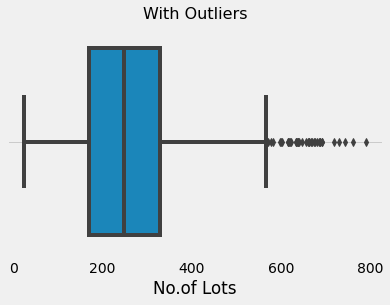

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


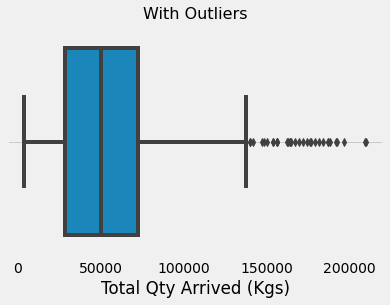

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


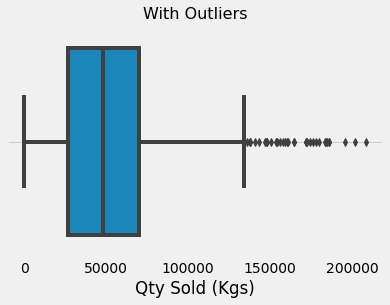

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


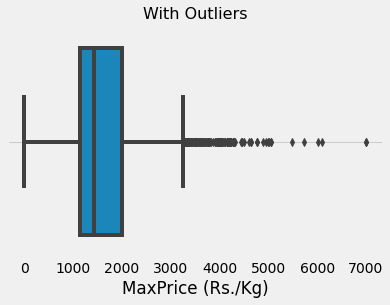

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


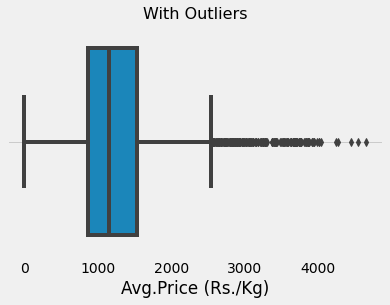

In [47]:
### Checking for outliers
import seaborn as sns
cols = ['No.of Lots','Total Qty Arrived (Kgs)','Qty Sold (Kgs)','MaxPrice (Rs./Kg)','Avg.Price (Rs./Kg)']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.title('With Outliers',fontsize=16)
    plt.show();

In [54]:
### Treating Outliers as the same may create havoc in regression models
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [55]:
df.dtypes

Sno                                object
Date of Auction            datetime64[ns]
Auctioneer                         object
No.of Lots                          int64
Total Qty Arrived (Kgs)           float64
Qty Sold (Kgs)                    float64
MaxPrice (Rs./Kg)                 float64
Avg.Price (Rs./Kg)                float64
dtype: object

In [64]:
for column in df.columns:
    if df[column].dtype == 'float': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])
        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


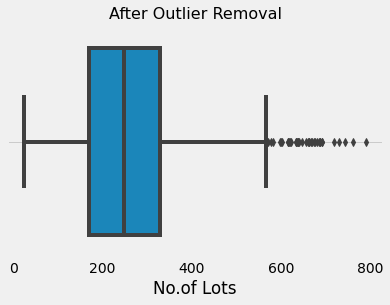

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


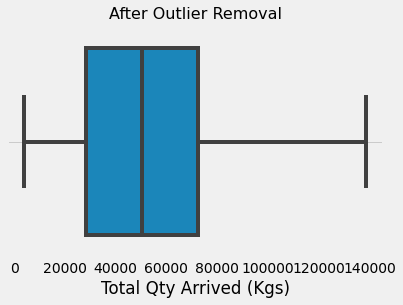

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


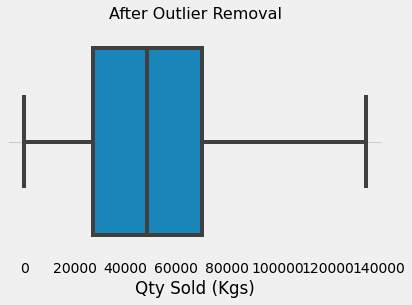

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


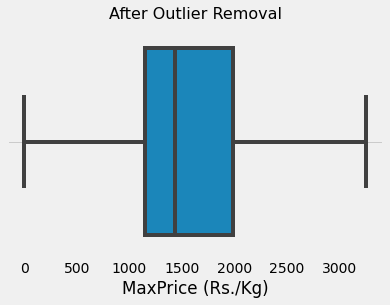

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


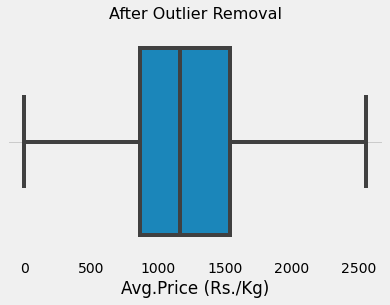

In [65]:
cols = ['No.of Lots','Total Qty Arrived (Kgs)','Qty Sold (Kgs)','MaxPrice (Rs./Kg)','Avg.Price (Rs./Kg)']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.title('After Outlier Removal',fontsize=16)
    plt.show();


In [66]:
df.head()

,Sno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,1900-01-01 00:00:00,2021-04-22,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,210,70654.2,70113.5,1725.0,1132.99
1,2,2021-04-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70
3,4,2021-04-19,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
5,6,2021-04-17,The Kerala Cardamom Processing and Marketing C...,234,74573.8,73856.0,1872.0,1251.65
6,7,2021-04-16,"Mas Enterprises, Vandanmettu",315,88986.6,77634.6,1875.0,1292.21


In [67]:
df.drop(['Sno'],axis=1,inplace=True)
df

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,2021-04-22,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,210,70654.2,70113.5,1725.0,1132.99
1,2021-04-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70
3,2021-04-19,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
5,2021-04-17,The Kerala Cardamom Processing and Marketing C...,234,74573.8,73856.0,1872.0,1251.65
6,2021-04-16,"Mas Enterprises, Vandanmettu",315,88986.6,77634.6,1875.0,1292.21
...,...,...,...,...,...,...,...
2828,2015-05-02,Green House Cardamom Mktg.India Pvt. Ltd,211,28950.0,27568.0,846.0,655.47
2830,2015-05-01,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,82,10281.0,10132.0,916.0,680.56
2832,2015-01-14,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
2833,2014-11-07,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73


In [68]:
### sorting the  data set by date
sorted_df = df. sort_values(by=["Date of Auction"], ascending=True)
sorted_df

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
2834,2014-11-04,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2833,2014-11-07,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2832,2015-01-14,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
2830,2015-05-01,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,82,10281.0,10132.0,916.0,680.56
2828,2015-05-02,Green House Cardamom Mktg.India Pvt. Ltd,211,28950.0,27568.0,846.0,655.47
...,...,...,...,...,...,...,...
6,2021-04-16,"Mas Enterprises, Vandanmettu",315,88986.6,77634.6,1875.0,1292.21
5,2021-04-17,The Kerala Cardamom Processing and Marketing C...,234,74573.8,73856.0,1872.0,1251.65
3,2021-04-19,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
1,2021-04-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70


In [69]:
# set the index to be the date
df=sorted_df.set_index(pd.DatetimeIndex(sorted_df["Date of Auction"].values))
#show the data
df

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
2014-11-04,2014-11-04,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2014-11-07,2014-11-07,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2015-01-14,2015-01-14,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
2015-05-01,2015-05-01,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,82,10281.0,10132.0,916.0,680.56
2015-05-02,2015-05-02,Green House Cardamom Mktg.India Pvt. Ltd,211,28950.0,27568.0,846.0,655.47
...,...,...,...,...,...,...,...
2021-04-16,2021-04-16,"Mas Enterprises, Vandanmettu",315,88986.6,77634.6,1875.0,1292.21
2021-04-17,2021-04-17,The Kerala Cardamom Processing and Marketing C...,234,74573.8,73856.0,1872.0,1251.65
2021-04-19,2021-04-19,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,249,60773.5,49310.9,1825.0,1192.97
2021-04-21,2021-04-21,"South Indian Green Cardamom Company Ltd, Kochi",281,87032.9,63524.7,2177.0,1053.70


In [70]:
#now get only the average price
df=df[['Avg.Price (Rs./Kg)']]
df

,Avg.Price (Rs./Kg)
2014-11-04,765.73
2014-11-07,765.73
2015-01-14,861.93
2015-05-01,680.56
2015-05-02,655.47
...,...
2021-04-16,1292.21
2021-04-17,1251.65
2021-04-19,1192.97
2021-04-21,1053.70


In [71]:
# create a variable to store the number of days for which we want to predict the price
prediction_days=1
# create a new variable called prediction
df['prediction']=df[['Avg.Price (Rs./Kg)']].shift(-prediction_days)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Avg.Price (Rs./Kg),prediction
2014-11-04,765.73,765.73
2014-11-07,765.73,861.93
2015-01-14,861.93,680.56
2015-05-01,680.56,655.47
2015-05-02,655.47,682.17
...,...,...
2021-04-16,1292.21,1251.65
2021-04-17,1251.65,1192.97
2021-04-19,1192.97,1053.70
2021-04-21,1053.70,1132.99


In [72]:
# Drop the prediction variable from the dataframe
X = np.array(df.drop('prediction', axis=1))
# Remove the last n+1 rows of data where, n is the prediction_days
X=X[:len(df)-prediction_days-1]
X

array([[ 765.73],
       [ 765.73],
       [ 861.93],
       ...,
       [1292.21],
       [1251.65],
       [1192.97]])

In [73]:
# Create a dependent variable dataset (y)
y = np.array(df['prediction'])
#Get all the y values except the last n+1 rows
y=y[:-prediction_days-1]
y

array([ 765.73,  861.93,  680.56, ..., 1251.65, 1192.97, 1053.7 ])

In [74]:
#Split the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)

In [75]:
# Use the random forest regressor model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=2, random_state=1)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.996736260200146

In [76]:
model.score(X_test, y_test)

0.9851989029768405

In [77]:
### As can be seen, the model is performing very well with a 98.51% accuracy on the test set

In [78]:
#Show how close the predicted values and actual values are
prediction=model.predict(X_test)
#print the predicted values
print(prediction)
print()
#print the actual values
print(y_test)

[2552.71710248 1344.         1444.355      1744.12       1665.5
 1378.         1571.96        899.12       1415.645       615.39
 2552.71710248  962.07       2552.71710248 1354.47       2552.71710248
 1180.145      1094.85        915.85       1321.145      2522.99
 1075.53       1732.055      1444.355       587.56       1036.43
 1624.12       2552.71710248 1820.76       1710.89       1350.64
 2552.71710248 1146.745      1492.285       949.92        666.615
 2552.71710248 1492.015      2552.71710248 1081.645      1386.72
  967.38       1226.1         851.42        634.44        641.75
 1455.84        613.015       526.63        644.03       1168.07
  638.83        881.005      1313.6        1433.685       612.865
 1417.905      2552.71710248  712.61       2552.71710248 1647.025
  959.385      2552.71710248 1088.16       2331.89        986.79
 1573.99        645.735      1515.355      1362.895       686.29
 1317.5        2360.52       2552.71710248 2552.71710248 1358.61
  686.29       14

In [79]:
#Get the validation data for the model
#create a variable to store all the rows of the data except last n rows
temp_df=df[:-prediction_days]
#create a variable to store the independent price values
X_val=temp_df.tail(1)['Avg.Price (Rs./Kg)'][0]
#show the data
print(X_val)

1053.7


In [80]:
prediction=model.predict([[X_val]])
#print the price of cardamom for the next n days
print('The price of cardamom in', prediction_days, 'day(s) is predicted to be', prediction)
#print the actual value of the cardamom for the next n days
print('The actual price of cardamom was', temp_df.tail(1)['prediction'][0])

The price of cardamom in 1 day(s) is predicted to be [1084.6]
The actual price of cardamom was 1132.99


In [81]:
### The above model can predict for one day in future with an accuracy of approximately 98.5%.
### However we require to predict at least one month into future.